# Import Packages

In [3]:
import matplotlib.pyplot as plt
#Import package for pandas dataframe
import pandas as pd
# Import the regular expression module
import seaborn as sns
import numpy as np

# Import Clean Datasets

In [4]:
ratings = pd.read_csv( 'ratings.csv' ) # ratings for different books
b = pd.read_csv( 'books.csv' ) # list of books and necessary infor about the books
tag_frequency = pd.read_csv( 'Tidy_Data_for_Tag_Frequency.csv' )
Books_Per_Tag =  pd.read_csv( 'Tidy_Data_for_Books_Per_Tag.csv' )
tag_table = pd.read_csv('Tidy_Tag_Table.csv')
tag_frequency.head(10)

,tag_name,tag_id,Frequency
0,Books Read By Year,59812,59812
1,Owned Books,44351,44351
2,Ebooks,37090,37090
3,Favorite,35534,35534
4,Audio Books,32747,32747
5,Fiction,26252,26252
6,Science Fiction & Fantasy,20111,20111
7,Children Books,18314,18314
8,Young-Adult,12035,12035
9,to-read,9834,9834


## How Users Like to Tag Their Books ?

Text(0.5, 1.0, 'Top 15 Tags Based on User Preferences')

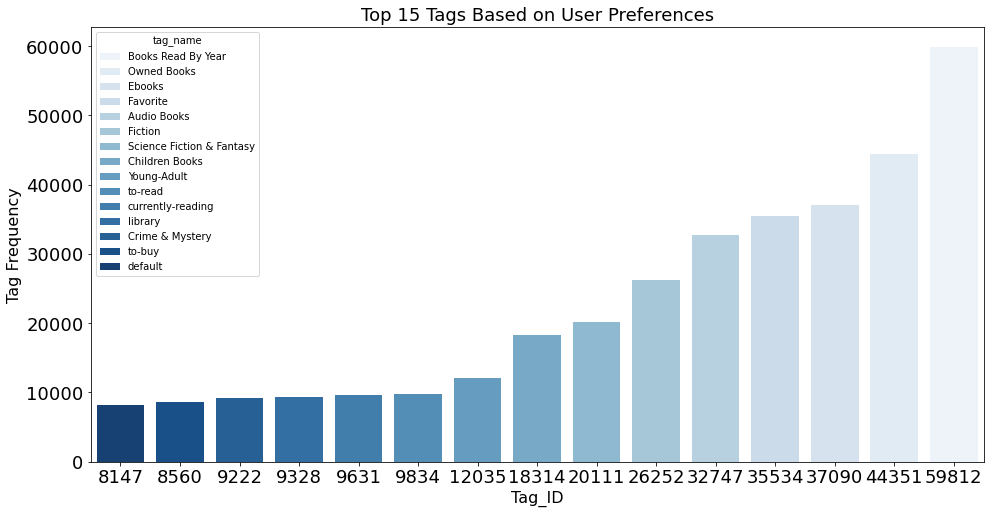

In [5]:
# How Users like to Shelve Their Books
plt.figure(figsize=(16, 8))
g = sns.barplot(x="tag_id", y="Frequency", hue = "tag_name",palette="Blues",data=tag_frequency[0:15][:],dodge=False)
plt.xlabel("Tag_ID", fontsize=16)
plt.ylabel("Tag Frequency", fontsize=16)
plt.xticks(  fontsize= 18)
plt.yticks(  fontsize= 18)
plt.title("Top 15 Tags Based on User Preferences",fontsize=18)

In [6]:
sum(tag_frequency.Frequency[0:15])/sum(tag_frequency.Frequency)

0.48558074356367115

### Observations:
     - Users in general like to keep a track of book they already read, currently reading and planning to read. They have a  preference to shelve the books they read in a given duration.  
     - Readers like to shelve Ebooks, Audiobooks separately from paperbacks 
     - Fiction seems to be the most popular category over other book categories
     - The top 15 tag_names contains 50% of the total tags made by the users

### Lets Group Tags Per Age Group

In [7]:
# Define a function to create a Boolean Mask 
def Filtered(dataframe,List):
    if dataframe in List:
        dataframe = True
    else:
        dataframe = False
    return dataframe

# Apply the filter function defined above to make a boolean mask to keep only the tags below
tag_names_adult = ['Fiction', 'Non-Fiction','Historical Fiction','Science','History','Women Book List','Crime & Mystery','Science Fiction & Fantasy','romance']
tag_names_to_ya = ['Young-Adult','Young-Adult-Fantasy','Young-Adult-Fiction','Young-Adult-Romance','Young-Adult-Paranormal']
tag_names_children = ['Children Books']
tag_names_to_keep = tag_names_adult + tag_names_to_ya + tag_names_children
filter = tag_frequency.tag_name.apply(lambda x:Filtered(x,tag_names_to_keep ))

# Use the boolean mask to filter data
tags_for_book_categories = tag_frequency[filter]
tags_for_book_categories.head()


,tag_name,tag_id,Frequency
5,Fiction,26252,26252
6,Science Fiction & Fantasy,20111,20111
7,Children Books,18314,18314
8,Young-Adult,12035,12035
12,Crime & Mystery,9222,9222


In [8]:
# Add a column to group categories as Adult, Young - Adult and Children\Childhood 

In [9]:
def filter_by_age_group(dataframe,adult,young_adult,children):
    if dataframe in adult:
        dataframe = 'Adult'
    if dataframe in young_adult:
        dataframe = 'Young-Adult'
    if dataframe in children:
        dataframe = 'Children/Childhood'
    return dataframe

tags_for_book_categories ['Age_Group'] = tags_for_book_categories.tag_name.apply(lambda x:filter_by_age_group(x,tag_names_adult,tag_names_to_ya,tag_names_children))
tags_for_book_categories.head()
                                                                      

<ipython-input-9-be6c175811fd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tags_for_book_categories ['Age_Group'] = tags_for_book_categories.tag_name.apply(lambda x:filter_by_age_group(x,tag_names_adult,tag_names_to_ya,tag_names_children))


,tag_name,tag_id,Frequency,Age_Group
5,Fiction,26252,26252,Adult
6,Science Fiction & Fantasy,20111,20111,Adult
7,Children Books,18314,18314,Children/Childhood
8,Young-Adult,12035,12035,Young-Adult
12,Crime & Mystery,9222,9222,Adult


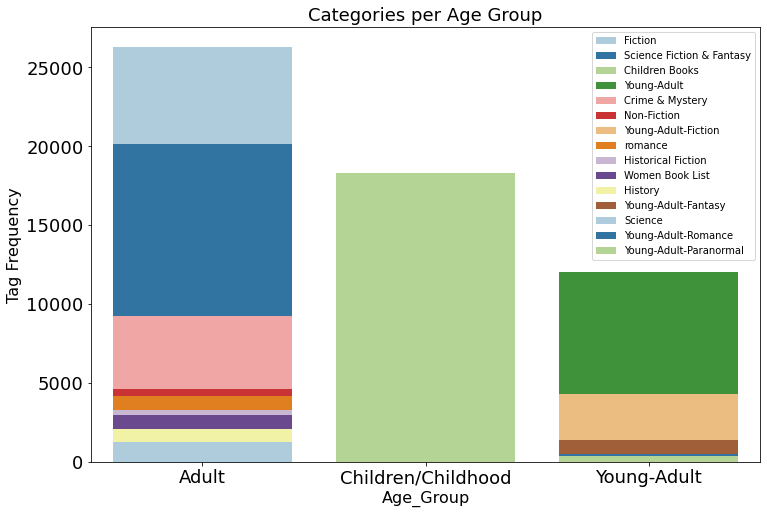

In [10]:
# How Users like to Shelve Their Books
plt.figure(figsize=(12, 8))
g = sns.barplot(x="Age_Group", y="Frequency", hue = "tag_name",palette="Paired",data=tags_for_book_categories[0:15][:],dodge=False)
plt.xlabel( "Age_Group",fontsize=16)
plt.ylabel("Tag Frequency", fontsize=16)
plt.xticks(  fontsize= 18)
plt.yticks(  fontsize= 18)
plt.title("Categories per Age Group",fontsize=18)
plt.legend(loc='upper right')

### Observations:

- Most tag_names are for adult books than other age groups. For example, children/ childhood books has no sub-categories, and yound adult book has few subcategories compared to adult books.
- Fiction dominates as the popular category for all users.

## What are the Categories in Each Group?

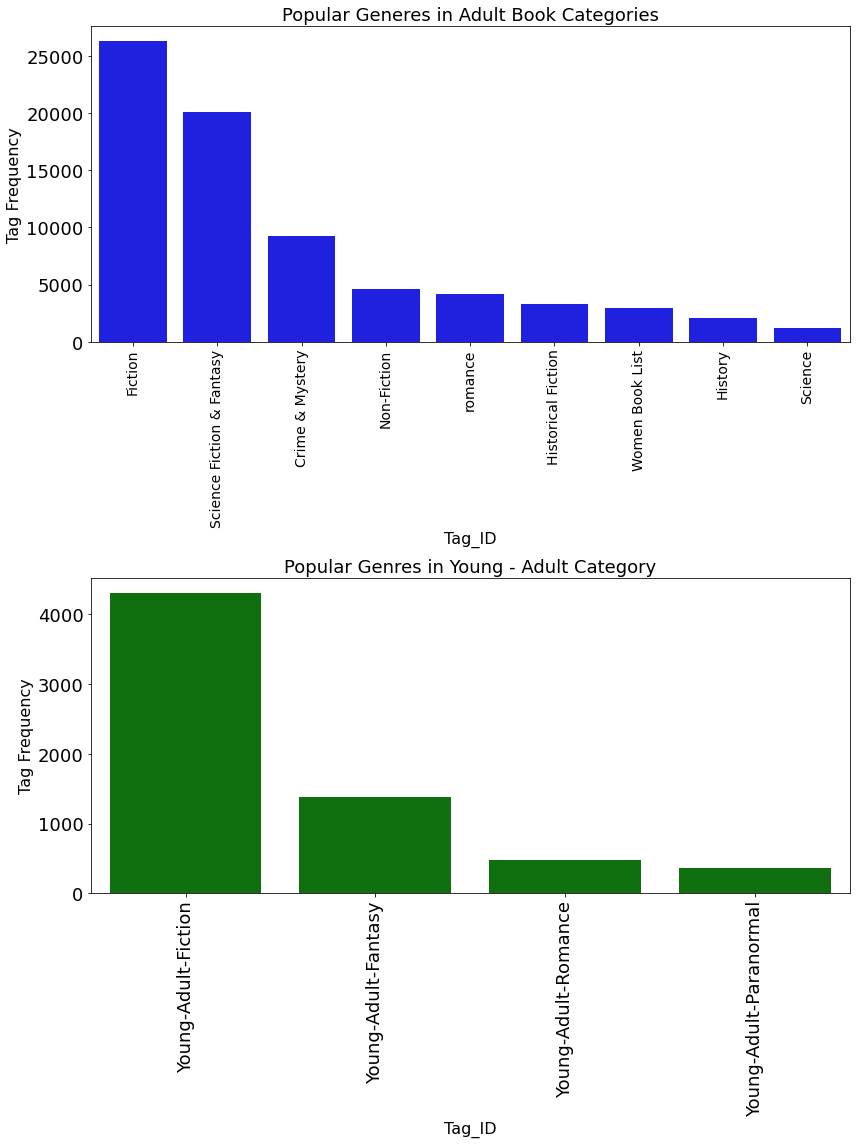

In [11]:
# Plot Popular Adult Subcategories

Freq_Adult_SubCategories = tags_for_book_categories[tags_for_book_categories['Age_Group'] == "Adult"]
plt.figure(figsize = (12, 16))
plt.subplot(2, 1, 1)
g = sns.barplot(x="tag_name", y="Frequency",color="Blue",data=Freq_Adult_SubCategories )
plt.xlabel("Tag_ID", fontsize=16)
plt.ylabel("Tag Frequency", fontsize=16)
plt.xticks(rotation = 90, fontsize=14)
plt.yticks(  fontsize= 18)
plt.title("Popular Generes in Adult Book Categories",fontsize=18)


# sub-categories in young adult

def filter_YA_Sub_categotires(dataframe,List):
    if dataframe in List:
        dataframe = True
    else: 
        dataframe = False
    return dataframe
   
sub_YA_categories = ['Young-Adult-Fantasy','Young-Adult-Fiction','Young-Adult-Romance','Young-Adult-Paranormal']
Filter_YA_SubCategories = tags_for_book_categories.tag_name.apply(lambda x:filter_YA_Sub_categotires(x,sub_YA_categories))
Frequent_YA_SubCategories = tags_for_book_categories[Filter_YA_SubCategories]
    
plt.subplot(2, 1, 2)
g = sns.barplot(x="tag_name", y="Frequency",color="Green",data = Frequent_YA_SubCategories)
plt.xlabel("Tag_ID", fontsize=16)
plt.ylabel("Tag Frequency", fontsize=16)
plt.xticks(rotation = 90,  fontsize=18)
plt.yticks(  fontsize= 18)
plt.title("Popular Genres in Young - Adult Category",fontsize=18)


plt.tight_layout()
plt.show()

### Observations:

- Beside fiction in general, tags related to Science Fiction and Fantasy seems to be used more frequently than other categories in both adult and young adult section. Some other popular categories are Crime  & Mysetery, Historical Fiction etc.Based on the list, one assumtion that we can draw is that majority of the readers like different kinds of fiction over books based on actual events/facts (i.e. History or Science)

Now lets take a look at the top 15 books marked as favorites and get an idea if the same sub - categories are liked by the users.

## What are the Top 15 Books Shelved as Favorites?

In [12]:
# Top 15 Books Sheleved as Favorites
tag_table_pivot_table = tag_table.pivot_table(index = 'title', columns = 'tag_name', values = 'count', aggfunc='sum' )

#Make a list oftags for all grouped Generes and Favorites 
tag_names_to_keep_pivot_table = tag_names_to_keep + ['Favorite']
tag_table_pivot_table = tag_table_pivot_table[tag_names_to_keep_pivot_table]

#Drop cells with NaN in Favorites
tag_table_pivot_table.dropna(axis=0, subset=['Favorite']) 

# Rank the books in order of the times they have been tagged as Favorites
tag_table_pivot_table_sorted = tag_table_pivot_table.sort_values(by ='Favorite',ascending = False)
rank_limit = tag_table_pivot_table_sorted.shape[0]
tag_table_pivot_table_sorted['Rank'] = [x+1 for x in range(rank_limit )]

In [13]:
# Top_15_Favorite Books
Top_15_Fav =tag_table_pivot_table_sorted['Favorite'][0:15]
print('Top 15 books based on their tag count as favorites \n')
Top_15_Fav 

Top 15 books based on their tag count as favorites 



title
The Hunger Games (The Hunger Games, #1)                        61997.0
Harry Potter and the Sorcerer's Stone (Harry Potter, #1)       60036.0
Harry Potter and the Deathly Hallows (Harry Potter, #7)        50777.0
Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)    50256.0
The Fault in Our Stars                                         43330.0
Harry Potter and the Half-Blood Prince (Harry Potter, #6)      42610.0
Harry Potter and the Chamber of Secrets (Harry Potter, #2)     38064.0
Pride and Prejudice                                            38053.0
To Kill a Mockingbird                                          37430.0
The Book Thief                                                 36551.0
Divergent (Divergent, #1)                                      34910.0
The Perks of Being a Wallflower                                28039.0
Mockingjay (The Hunger Games, #3)                              27367.0
The Great Gatsby                                               24368.0


## What Catergories Do These Top 15 Books Belong to?

In [14]:
'''We will have to unpivot the top 15 books to put all the category columns into a single columm. We will keep the title column unchanged, 
the values under each column represents count. We will put them in the group.''' 

tag_table_pivot_table_sorted = tag_table_pivot_table_sorted.reset_index()


C:\Users\ishah40\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(0.0, 50000.0)

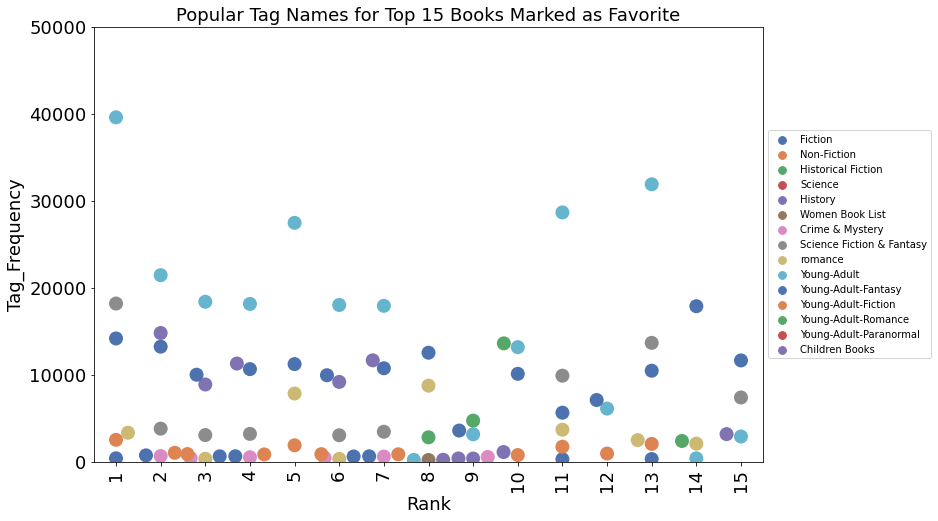

In [15]:
tag_table_pivot_table_melted = pd.melt(tag_table_pivot_table_sorted[0:15], value_name='count',id_vars = ['title','Rank'])#.dropna()
tag_table_pivot_table_melted = tag_table_pivot_table_melted [tag_table_pivot_table_melted.tag_name != 'Favorite']
tag_table_pivot_table_melted.sort_values(by='count',ascending = False)

plt.figure(figsize = (12, 8))
sns.swarmplot(x = 'Rank' ,y = 'count', hue = 'tag_name', palette = 'deep',data = tag_table_pivot_table_melted, size= 14)

plt.xticks(rotation = 90,  fontsize=18)
plt.yticks(  fontsize= 18)
plt.xlabel('Rank', fontsize=18)
plt.ylabel( 'Tag_Frequency', fontsize= 18)
plt.title('Popular Tag Names for Top 15 Books Marked as Favorite',fontsize=18)

#put legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size':10})
plt.ylim(0,50000)
plt.ylim(0,50000)

### Observations

-  9 of the top 15 favorite books are most frequently tagged in the Young - Adult Category.The popular categories in the top 15 books are science fiction and fantasy, romance, historical fiction or fiction in general. The harry potter books (2,3,4,6,7) have also been freqently tagged as children/childhood books.

- We will extract the details of these books from books.csv dataset to get an idea of what factors may lead to their popularity. For example, the fact that most of the books have been tagged as Young Adult and Childhood books indicate that these books may have been published a while ago and were the favorite books of many of the adult readers while they were young.

## When Did These Top 15 Favorite Books Publish?

In [16]:
# Lets find the title of these books from the book dataset
Filter = list(Top_15_Fav.index)
b.loc[b['original_title'].isin(Filter)]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,...,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...
46,47,19063,19063,878368,251,375831002,9.780376e+12,Markus Zusak,2005.0,The Book Thief,...,1159741,1287798,93611,17892,35360,135272,377218,722056,https://images.gr-assets.com/books/1390053681m...,https://images.gr-assets.com/books/1390053681s...
67,68,22628,22628,2236198,128,671027344,9.780671e+12,Stephen Chbosky,1999.0,The Perks of Being a Wallflower,...,888806,954905,47116,14286,38658,143440,297501,461020,https://images.gr-assets.com/books/1167352178m...,https://images.gr-assets.com/books/1167352178s...
465,466,659469,659469,16998382,44,345368584,9.780345e+12,"Chuck Dixon, J.R.R. Tolkien, David Wenzel, Sea...",1989.0,The Hobbit,...,155338,159435,957,991,2180,14437,43107,98720,https://images.gr-assets.com/books/1374681632m...,https://images.gr-assets.com/books/1374681632s...


In [17]:
# Only 7 results are returned when we search by title, so lets search by goodreads_book_id. So the first step is to find the good reads book id, and then use them to filter book details

top_15_goodreads_book_id = list(tag_table.loc[tag_table['title'].isin(Filter)].goodreads_book_id.unique())
b.loc[b['goodreads_book_id'].isin(top_15_goodreads_book_id )]


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,...,2071616,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,...,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...
11,12,13335037,13335037,13155899,210,62024035,9.780062e+12,Veronica Roth,2011.0,Divergent,...,1903563,2216814,101023,36315,82870,310297,673028,1114304,https://images.gr-assets.com/books/1328559506m...,https://images.gr-assets.com/books/1328559506s...
17,18,5,5,2402163,376,043965548X,9.780440e+12,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,Harry Potter and the Prisoner of Azkaban,...,1832823,1969375,36099,6716,20413,166129,509447,1266670,https://images.gr-assets.com/books/1499277281m...,https://images.gr-assets.com/books/1499277281s...
19,20,7260188,7260188,8812783,239,439023513,9.780439e+12,Suzanne Collins,2010.0,Mockingjay,...,1719760,1870748,96274,30144,110498,373060,618271,738775,https://images.gr-assets.com/books/1358275419m...,https://images.gr-assets.com/books/1358275419s...


In [18]:
Top_15_Fav_Books = b.loc[b['goodreads_book_id'].isin(top_15_goodreads_book_id )][['book_id','goodreads_book_id','authors','original_publication_year','original_title','ratings_1','ratings_2','ratings_3','ratings_4','ratings_5']]
Top_15_Fav_Books

,book_id,goodreads_book_id,authors,original_publication_year,original_title,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,2767052,Suzanne Collins,2008.0,The Hunger Games,66715,127936,560092,1481305,2706317
1,2,3,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,75504,101676,455024,1156318,3011543
3,4,2657,Harper Lee,1960.0,To Kill a Mockingbird,60427,117415,446835,1001952,1714267
4,5,4671,F. Scott Fitzgerald,1925.0,The Great Gatsby,86236,197621,606158,936012,947718
5,6,11870085,John Green,2012.0,The Fault in Our Stars,47994,92723,327550,698471,1311871
6,7,5907,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,46023,76784,288649,665635,1119718
9,10,1885,Jane Austen,1813.0,Pride and Prejudice,54700,86485,284852,609755,1155673
11,12,13335037,Veronica Roth,2011.0,Divergent,36315,82870,310297,673028,1114304
17,18,5,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,Harry Potter and the Prisoner of Azkaban,6716,20413,166129,509447,1266670
19,20,7260188,Suzanne Collins,2010.0,Mockingjay,30144,110498,373060,618271,738775


### Observations

- None of the top 15 favorite books are from recent times, it means the readership has grown over the years leading to higher number of tag frequencies. Some of the books were published at least a decade ago, and the oldest (Pride and Prejudice) date backs to 1813. 

## Who are the Authors of the Books Marked as Favorites by Most Users?

In [19]:
Top_15_Fav_Books.authors.value_counts()

J.K. Rowling, Mary GrandPré                4
Suzanne Collins                            2
Markus Zusak                               1
John Green                                 1
F. Scott Fitzgerald                        1
J.R.R. Tolkien                             1
Veronica Roth                              1
Stephen Chbosky                            1
Jane Austen                                1
J.K. Rowling, Mary GrandPré, Rufus Beck    1
Harper Lee                                 1
Name: authors, dtype: int64

### Observation:
JK Rowling is everyone's favorite author

## What are the Top 15 Books based on Ratings?

In [20]:
b['Total Reviews'] =  b[['ratings_1','ratings_2','ratings_3','ratings_4','ratings_5']].sum(axis = 1)
b['Avg Rating'] =  (b['ratings_1']*1 + b['ratings_2']*2 + b['ratings_3']*3 + b['ratings_4']*4 + b['ratings_5']*5)/b['Total Reviews']

b_ratings = b [['goodreads_book_id','original_title','authors','original_publication_year',
'Total Reviews','Avg Rating']]
Top_15_Rated = b_ratings.sort_values(by = 'Avg Rating',ascending = False)[0:15]
Top_15_Rated

,goodreads_book_id,original_title,authors,original_publication_year,Total Reviews,Avg Rating
3627,24812,The Complete Calvin and Hobbes,Bill Watterson,2005.0,29968,4.818306
3274,8,NaN,"J.K. Rowling, Mary GrandPré",2003.0,33424,4.772349
861,17332218,Words of Radiance,Brandon Sanderson,2014.0,108176,4.765142
7946,5031805,NaN,"Anonymous, Lane T. Dennis, Wayne A. Grudem",2002.0,10784,4.763724
8853,95602,Mark of the Lion Trilogy,Francine Rivers,1993.0,9547,4.759087
4482,24814,It's a Magical World: A Calvin and Hobbes Coll...,Bill Watterson,1996.0,23429,4.754492
6360,70489,There's Treasure Everywhere: A Calvin and Hobb...,Bill Watterson,1996.0,17285,4.740989
421,862041,Complete Harry Potter Boxed Set,J.K. Rowling,1998.0,204125,4.740448
6919,24815,The Indispensable Calvin and Hobbes: A Calvin ...,Bill Watterson,1992.0,16911,4.730176
3752,10,"Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,2005.0,26274,4.727754


Observations :
    
    - Except for Harry potter, none of the books in the Top 15 favorites are in the top rated list. However, the # reviews for these books are fairly low compared to the average reviews ( 2437524) received by books listed as favorites. 

## Do Favorite Books Receive More Reviews than the Rest of the Books?

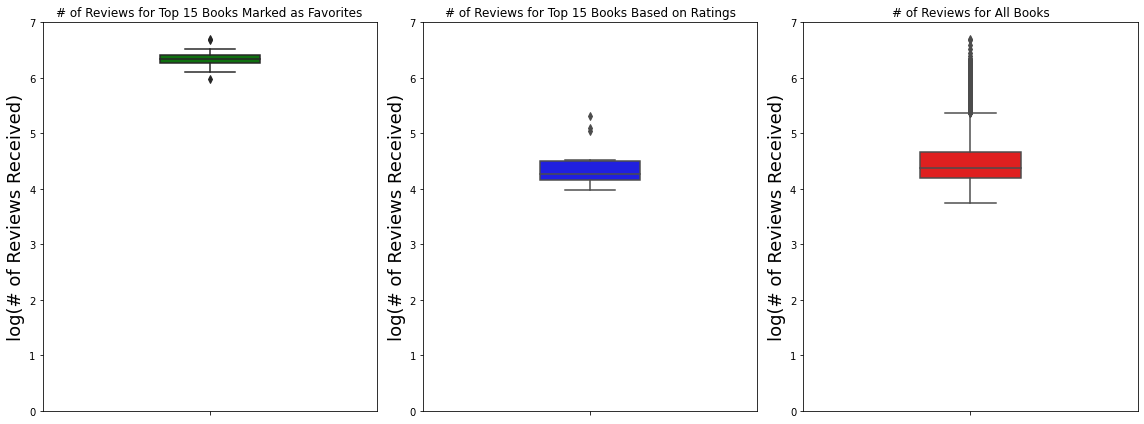

Median # of reviews for the books rated as favorite: 
 2191465.0
Median # of reviews for the top rated 15 books: 
 18198.0
Median # of reviews for all the the books: 
 23832.5


In [21]:
## Total Number of Ratings Recieved by Each of the Favorite Books and Highly Rated Books
Top_15_Fav_Books['Top_15_Fav_Books Reviews']  = b.loc[b['goodreads_book_id'].isin(top_15_goodreads_book_id )]['Total Reviews']

## Overlaying two boxplots in Seaborn
plt.figure(figsize = (16, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y = np.log10(Top_15_Fav_Books['Top_15_Fav_Books Reviews']), width=0.3, color = 'green')
plt.ylabel('log(# of Reviews Received)', fontsize=18)
plt.ylim(0,7)
plt.title('# of Reviews for Top 15 Books Marked as Favorites')


plt.subplot(1, 3, 2)
sns.boxplot(y = np.log10(Top_15_Rated['Total Reviews']), width=0.3 , color = 'blue')
plt.ylabel('log(# of Reviews Received)', fontsize=18)
plt.ylim(0,7)
plt.title('# of Reviews for Top 15 Books Based on Ratings')

plt.subplot(1, 3, 3)
sns.boxplot(y = np.log10(b['Total Reviews']),width=0.3, color = 'red')
plt.ylabel('log(# of Reviews Received)', fontsize=18)
plt.ylim(0,7)
plt.title('# of Reviews for All Books')

plt.tight_layout()
plt.show()

print ('Median # of reviews for the books rated as favorite: \n',Top_15_Fav_Books['Top_15_Fav_Books Reviews']  .median())
print ('Median # of reviews for the top rated 15 books: \n',Top_15_Rated['Total Reviews'] .median())
print ('Median # of reviews for all the the books: \n',b['Total Reviews'] .median())

### Observation:
- As can be seen from the box plots above, books shelved a favorites have recieved a significantly higher number of reviews compared to other books. The y scale in the box plot are in log scale. So if we have to recommend a user a new book to read, we should probably look at the reader's most favorite list first as the possibility for someone to like that same book is significantly higher.

- Users like to put on a review for books they mark as favorites

## How are Favorite Books Rated Compared to Other Books ?

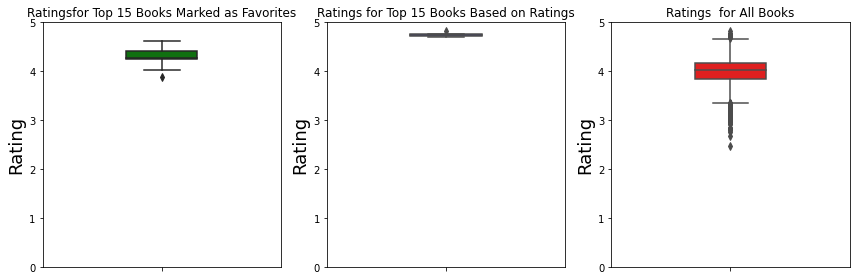

Median of the ratings for the books rated as favorite: 
 4.264217954505934
Median of the ratings for the books with high ratings: 
 4.740448254745867
Median of the ratings for all the the books: 
 4.018821797349181


In [22]:
## Total Number of Ratings Recieved by Each of the Favorite Books 
Top_15_Fav_Books['Top_15_Fav_Avg_Rating']  = (Top_15_Fav_Books['ratings_1']*1 + Top_15_Fav_Books['ratings_2']*2 + Top_15_Fav_Books['ratings_3']*3 + Top_15_Fav_Books['ratings_4']*4 + Top_15_Fav_Books['ratings_5']*5)/Top_15_Fav_Books['Top_15_Fav_Books Reviews']
b['Avg Rating'] =  (b['ratings_1']*1 + b['ratings_2']*2 + b['ratings_3']*3 + b['ratings_4']*4 + b['ratings_5']*5)/b['Total Reviews']

plt.figure(figsize = (12,4))
plt.subplot(1, 3, 1)
sns.boxplot(y = Top_15_Fav_Books['Top_15_Fav_Avg_Rating'], width=0.3, color = 'green')
plt.ylabel('Rating', fontsize=18)
plt.ylim(0,5)
plt.title('Ratingsfor Top 15 Books Marked as Favorites')

plt.subplot(1, 3, 2)
sns.boxplot(y = Top_15_Rated['Avg Rating'],width=0.3, color = 'blue')
plt.ylabel('Rating', fontsize=18)
plt.ylim(0,5)
plt.title('Ratings for Top 15 Books Based on Ratings')

plt.subplot(1, 3, 3)
sns.boxplot(y = b['Avg Rating'],width=0.3,color = 'red')
plt.ylabel('Rating', fontsize=18)
plt.ylim(0,5)
plt.title('Ratings  for All Books')
plt.tight_layout()
plt.show()

print ('Median of the ratings for the books rated as favorite: \n',Top_15_Fav_Books['Top_15_Fav_Avg_Rating'] .median())
print ('Median of the ratings for the books with high ratings: \n',Top_15_Rated['Avg Rating'].median())
print ('Median of the ratings for all the the books: \n',b['Avg Rating'] .median())

### Observation

- Based on the high average ratings of the books, it seems that readers in general like to rate the books fairly high. 
- We should also rank the book dataset by ratings and check how many of books marked frequently as favorites are there.

In [23]:
Top_15_Fav.index

Index(['The Hunger Games (The Hunger Games, #1)',
       'Harry Potter and the Sorcerer's Stone (Harry Potter, #1)',
       'Harry Potter and the Deathly Hallows (Harry Potter, #7)',
       'Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)',
       'The Fault in Our Stars',
       'Harry Potter and the Half-Blood Prince (Harry Potter, #6)',
       'Harry Potter and the Chamber of Secrets (Harry Potter, #2)',
       'Pride and Prejudice', 'To Kill a Mockingbird', 'The Book Thief',
       'Divergent (Divergent, #1)', 'The Perks of Being a Wallflower',
       'Mockingjay (The Hunger Games, #3)', 'The Great Gatsby', 'The Hobbit'],
      dtype='object', name='title')

Few Factors for a Reader to Like this Book

- User Id 
- Books they Rated 
- Ratings They Gave 
- year of publication
- categories
- total number of reviews
- Ratings 
- Author

## What Ratings Most of the Users Like to Give?

C:\Users\ishah40\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count Plot of User Ratings')

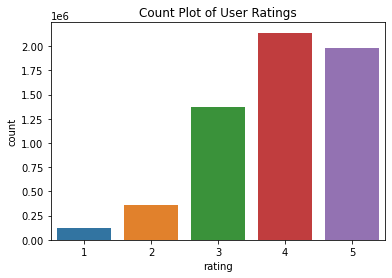

In [24]:
ratings.head()
sns.countplot('rating', data = ratings)
plt.title('Count Plot of User Ratings')

### Observations:
- The count plot shows that users are more likely to rate a book 4 or higher.

## What are the Most Frequent Tags a Books Receives?

In [25]:
# Filter out the top 5 tags received by each book and store then as a seprate column in the dataframe. 
tag_table_pivot_table_melted = pd.melt(tag_table_pivot_table_sorted, value_name='count',id_vars = ['title','Rank'])#.dropna()
tag_table_pivot_table_melted = tag_table_pivot_table_melted [tag_table_pivot_table_melted.tag_name != 'Favorite']
frequent_tb = tag_table_pivot_table_melted.sort_values(by='count',ascending = False).dropna()
frequent_tb['People Often Tagged as'] = pd.Series()
for book in frequent_tb.title:
    popular_tag = list(set(frequent_tb[frequent_tb.title == book].tag_name))
    Boolean_Mask = frequent_tb.title==book 
    idx = list(frequent_tb.index[Boolean_Mask])
   
    for i in idx:
        frequent_tb['People Often Tagged as'][i] = popular_tag[:5]        

<ipython-input-25-59ba10c5cb1b>:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequent_tb['People Often Tagged as'] = pd.Series()
<ipython-input-25-59ba10c5cb1b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frequent_tb['People Often Tagged as'][i] = popular_tag[:5]
C:\Users\ishah40\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [26]:
frequent_tb[frequent_tb.title == 'The Hunger Games (The Hunger Games, #1)' ]

,title,Rank,tag_name,count,People Often Tagged as
88326,"The Hunger Games (The Hunger Games, #1)",1,Young-Adult,39604.0,"[Young-Adult, Young-Adult-Fantasy, Science Fic..."
68698,"The Hunger Games (The Hunger Games, #1)",1,Science Fiction & Fantasy,18196.0,"[Young-Adult, Young-Adult-Fantasy, Science Fic..."
0,"The Hunger Games (The Hunger Games, #1)",1,Fiction,14183.0,"[Young-Adult, Young-Adult-Fantasy, Science Fic..."
78512,"The Hunger Games (The Hunger Games, #1)",1,romance,3341.0,"[Young-Adult, Young-Adult-Fantasy, Science Fic..."
107954,"The Hunger Games (The Hunger Games, #1)",1,Young-Adult-Fiction,2528.0,"[Young-Adult, Young-Adult-Fantasy, Science Fic..."
98140,"The Hunger Games (The Hunger Games, #1)",1,Young-Adult-Fantasy,399.0,"[Young-Adult, Young-Adult-Fantasy, Science Fic..."


In [27]:
# Only store one data per book that shows the most frequent tag, corresponding count and the top 5 tags
idx =frequent_tb.groupby(['title'])['count'].transform(max) == frequent_tb['count']
book_tags = frequent_tb[idx].sort_values(by='count',ascending = False)
#Lets drop the column Rank
book_tags = book_tags.drop('Rank',axis = 1)

In [28]:
# Merge book_id, author info from books.csv  with book_tags
b['title'] = b["original_title"]
filter_b = b[['title','book_id','authors','Avg Rating',]]
tag_kw_recom_dataset = filter_b.merge(book_tags, on ='title')
tag_kw_recom_dataset.head()

,title,book_id,authors,Avg Rating,tag_name,count,People Often Tagged as
0,To Kill a Mockingbird,4,Harper Lee,4.254818,Historical Fiction,4735.0,"[Young-Adult, History, Crime & Mystery, Histor..."
1,The Great Gatsby,5,F. Scott Fitzgerald,3.887376,Fiction,17889.0,"[Historical Fiction, Fiction, romance, Young-A..."
2,The Fault in Our Stars,6,John Green,4.264218,Young-Adult,27475.0,"[Young-Adult, Fiction, Young-Adult-Fiction, ro..."
3,The Catcher in the Rye,8,J.D. Salinger,3.790131,Fiction,15326.0,"[Young-Adult, Fiction, Historical Fiction]"
4,Pride and Prejudice,10,Jane Austen,4.243559,Fiction,12543.0,"[Young-Adult, Historical Fiction, Fiction, Wom..."


## Comparison of Average Ratings and Number of Books in Different Categories

In [29]:
#count total number of books in each category
count_books = tag_kw_recom_dataset.groupby('tag_name').count().sort_values(by= 'count',ascending = False);
#calculate the % of books in each category
total = count_books['count'].sum()
count_books ['count'] =[x*100/total for x in count_books['count']]
count_books.index

Index(['Fiction', 'Non-Fiction', 'Young-Adult', 'Children Books',
       'Science Fiction & Fantasy', 'Historical Fiction', 'Crime & Mystery',
       'romance', 'History', 'Science', 'Women Book List'],
      dtype='object', name='tag_name')

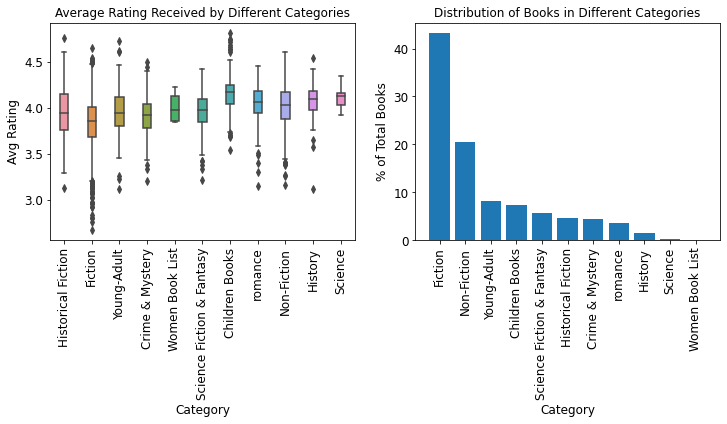

In [30]:
plt.figure(figsize = (12,4))

plt.subplot(1, 2, 1)
sns.boxplot(x = tag_kw_recom_dataset['tag_name'] ,y = tag_kw_recom_dataset['Avg Rating'], width=0.3)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Avg Rating', fontsize=12)
plt.xticks(rotation = 90,  fontsize=12)
plt.yticks(  fontsize= 12)
plt.title("Average Rating Received by Different Categories")

plt.subplot(1, 2, 2)
total = count_books['count'].sum()
count_books ['count'] =[x*100/total for x in count_books['count']]
plt.bar (count_books.index, count_books['count'])
plt.xlabel('Category', fontsize=12)
plt.ylabel('% of Total Books', fontsize = 12)
plt.xticks(rotation = 90,  fontsize=12)
plt.yticks(  fontsize= 12)
plt.title("Distribution of Books in Different Categories")

plt.show()

### Observations
- Readers do not have a bias towards rating a particular category higher than the others. The average rating in every category is close to the average rating of all the books and mostly range from 3.25 to 4.75. 
-  ~ %43 of the books in the dataset are Fiction, with Non - Fiction (20.5%), Young Adult (8.3%) and Science Fiction and Fantasy (5.73%) as other popular categories.

In [31]:
count_books['count']

tag_name
Fiction                      43.197194
Non-Fiction                  20.546229
Young-Adult                   8.293661
Children Books                7.416688
Science Fiction & Fantasy     5.737910
Historical Fiction            4.735655
Crime & Mystery               4.485091
romance                       3.558006
History                       1.578552
Science                       0.350789
Women Book List               0.100226
Name: count, dtype: float64

##  Which Authors Have More Books and How the Ratings Compare for Different Authors?

In [32]:
count_authors = tag_kw_recom_dataset.groupby('authors').count().sort_values(by= 'count',ascending = False);
total = count_books['count'].sum()
#count_books ['count'] =[x*100/total for x in count_books['count']]
most_books_auth = count_authors['count'] [0:10]
most_books_auth 

authors
Stephen King          44
Dean Koontz           35
John Grisham          29
Nora Roberts          28
Jodi Picoult          21
Kurt Vonnegut Jr.     15
Mary Higgins Clark    15
Sidney Sheldon        15
Nicholas Sparks       15
Michael Crichton      14
Name: count, dtype: int64

In [33]:
# Display full (non - truncated dataframe)
pd.set_option('display.max_colwidth', -1)
# Find top authors by rating
Authors_by_Rating = tag_kw_recom_dataset.groupby('authors').mean().sort_values(by= 'Avg Rating',ascending = False);
display(Authors_by_Rating ['Avg Rating'] )

<ipython-input-33-16adf3664623>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


authors
Bill Watterson                                                                                                                                                                                                              4.706259
Neil Gaiman, Mike Dringenberg, Chris Bachalo, Michael Zulli, Kelly Jones, Charles Vess, Colleen Doran, Malcolm Jones III, Steve Parkhouse, Daniel Vozzo, Lee Loughridge, Steve Oliff, Todd Klein, Dave McKean, Sam Kieth    4.651464
Angie Thomas                                                                                                                                                                                                                4.618345
Anonymous                                                                                                                                                                                                                   4.613276
Bill Watterson, G.B. Trudeau                                                

In [34]:
average_authors = tag_kw_recom_dataset.groupby('authors').median()
author_rating = {'Author': [], 'Rating': []}
for author in most_books_auth.index:
    author_rating['Author'].append(author)
    author_rating['Rating'].append(average_authors.loc[author] ['Avg Rating'])
author_rating = pd.DataFrame.from_dict(author_rating)
author_rating

,Author,Rating
0,Stephen King,3.896395
1,Dean Koontz,3.817734
2,John Grisham,3.795866
3,Nora Roberts,4.005326
4,Jodi Picoult,3.799404
5,Kurt Vonnegut Jr.,3.934352
6,Mary Higgins Clark,3.853492
7,Sidney Sheldon,3.680899
8,Nicholas Sparks,4.021555
9,Michael Crichton,3.674956


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1152x576 with 0 Axes>

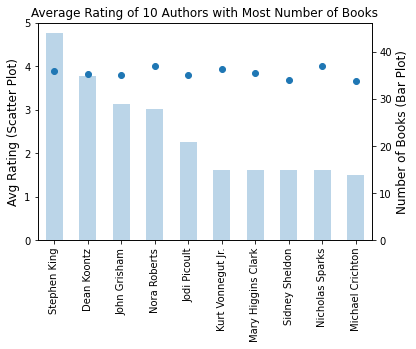

In [35]:
plt.figure(figsize = (16,8))
fig, ax1 = plt.subplots ()

ax2 = ax1.twinx()
ax1.scatter( author_rating.index, author_rating['Rating'])
#ax2.bar(most_books_auth.index,  most_books_auth.count)
ax2 = most_books_auth.plot(kind='bar',alpha = 0.3)

ax1.set_ylabel('Avg Rating (Scatter Plot)', fontsize=12)
ax2.set_ylabel('Number of Books (Bar Plot)', fontsize=12)
ax1.set_xticklabels(author_rating.Author,rotation= 90) 
ax1.set_ylim([0,5])
plt.title('Average Rating of 10 Authors with Most Number of Books')
plt.show

In [36]:
# Import Dataset
tag_kw_recom_dataset.to_csv('Additional dataset_for_tag&KW_recommendation.csv', encoding = 'utf-8')